### Scratch Assay on time series images

In [3]:
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters.rank import entropy
from skimage.morphology import disk
import numpy as np
from skimage.filters import threshold_otsu
import glob

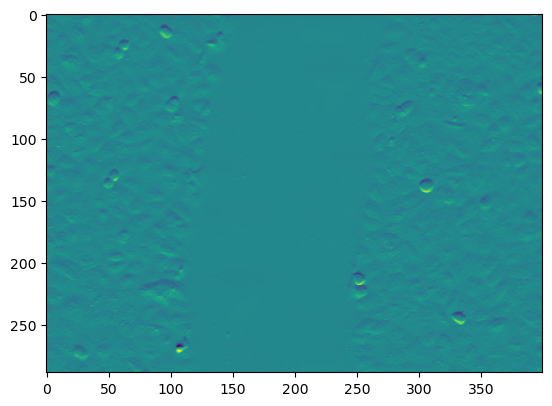

In [5]:
img = io.imread("scratch_assay_images/Scratch0.jpg")
plt.imshow(img)

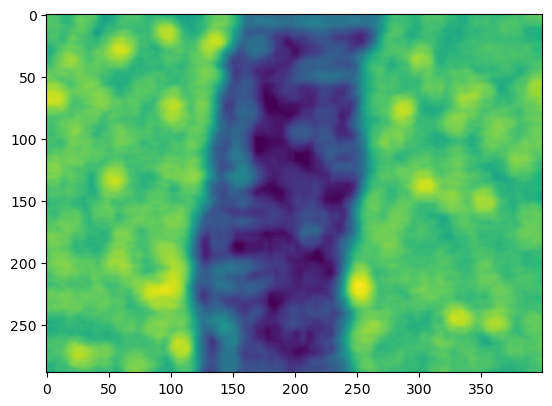

In [6]:
entropy_img = entropy(img, disk(10))
plt.imshow(entropy_img)

In [7]:
# optimal threshold to seperate regions
thresh = threshold_otsu(entropy_img) 
print(thresh)

2.962598676054716


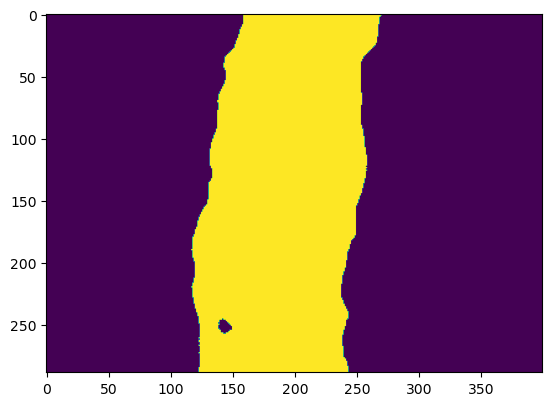

In [8]:
# area with entropy below threshold, which is scratch reigon
binary = entropy_img <= thresh
plt.imshow(binary)

In [9]:
scratch_area = np.sum(binary == 1)
print("Scratch area=", scratch_area, "pix\N{SUPERSCRIPT TWO}")

time= 0 hr   Scratch area= 34396 pix²


time= 0 hr   Scratch area= 33426 pix²
time= 1 hr   Scratch area= 27683 pix²
time= 2 hr   Scratch area= 24106 pix²
time= 3 hr   Scratch area= 21123 pix²
time= 4 hr   Scratch area= 18481 pix²
time= 5 hr   Scratch area= 16105 pix²
time= 6 hr   Scratch area= 14417 pix²
time= 7 hr   Scratch area= 12717 pix²
time= 8 hr   Scratch area= 10957 pix²
time= 9 hr   Scratch area= 9337 pix²


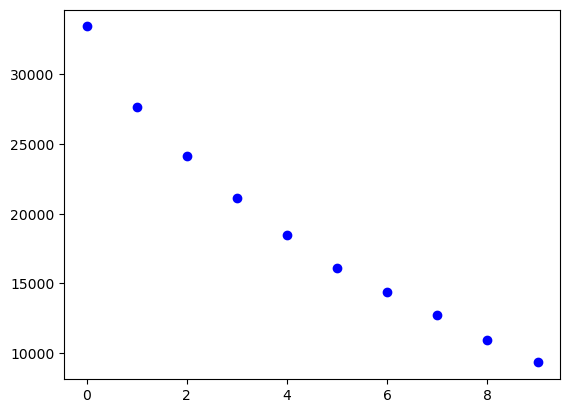

In [10]:
# Bulk processing
time = 0
time_list=[]
area_list=[]
path = "scratch_assay_images/*"

for file in glob.glob(path):
    dict={}
    img=io.imread(file)
    entropy_img = entropy(img, disk(3))
    thresh = threshold_otsu(entropy_img)
    binary = entropy_img <= thresh
    scratch_area = np.sum(binary == 1)
    print("time=", time, "hr  ", "Scratch area=", scratch_area, "pix\N{SUPERSCRIPT TWO}")
    time_list.append(time)
    area_list.append(scratch_area)
    time += 1

#print(time_list, area_list)
plt.plot(time_list, area_list, 'bo')  #Print blue dots scatter plot


In [11]:
#Print slope, intercept
from scipy.stats import linregress
print(linregress(time_list, area_list))


slope, intercept, r_value, p_value, std_err = linregress(time_list, area_list)
print("y = ",slope, "x", " + ", intercept  )
print("R\N{SUPERSCRIPT TWO} = ", r_value**2)
print("r-squared: %f" % r_value**2)


LinregressResult(slope=-2504.9818181818187, intercept=30107.618181818187, rvalue=-0.9782077625497586, pvalue=9.611311663586532e-07, stderr=187.9815999729088, intercept_stderr=1003.5471264263972)
y =  -2504.9818181818187 x  +  30107.618181818187
R² =  0.9568904267126049
r-squared: 0.956890
